<a href="https://colab.research.google.com/github/robitussin/CCMACLRL_EXERCISES/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2

Machine Learning pipeline

1. Import the necessary libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

2. Load the dataset


In [58]:
#put your answer here
df = pd.read_csv("iris.csv")
df.drop(columns='Id', inplace=True)

In [27]:
df['Species'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object>

In [59]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


3. Visualize the dataset

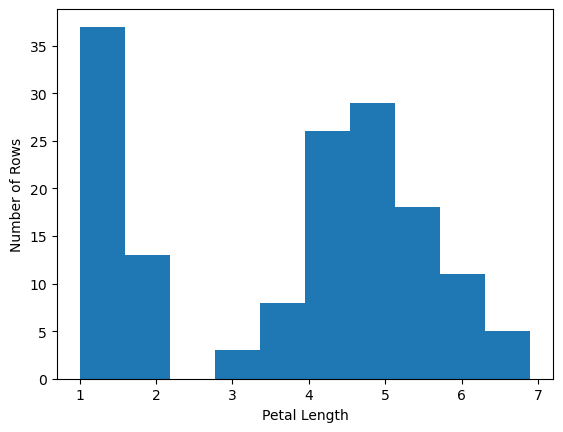

In [28]:
# put your answer here

plt.hist(df["PetalLengthCm"])
plt.xlabel("Petal Length")
plt.ylabel("Number of Rows")
plt.show()

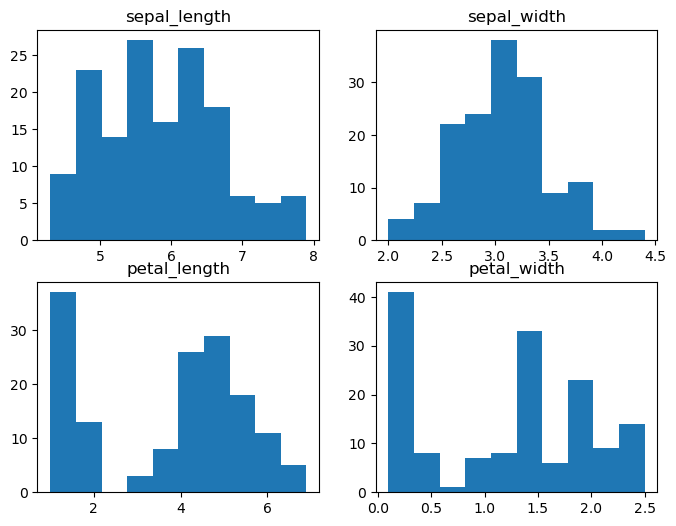

In [29]:
fig, ax = plt.subplots(2,2,figsize=(8,6))

ax[0,0].hist(df["SepalLengthCm"])
ax[0,1].hist(df["SepalWidthCm"])
ax[1,0].hist(df["PetalLengthCm"])
ax[1,1].hist(df["PetalWidthCm"])

ax[0,0].set_title("sepal_length")
ax[0,1].set_title("sepal_width")
ax[1,0].set_title("petal_length")
ax[1,1].set_title("petal_width")

plt.show()


In [30]:
colors = {'Iris-setosa':'red',
          'Iris-virginica':'blue',
          'Iris-versicolor':'green'}

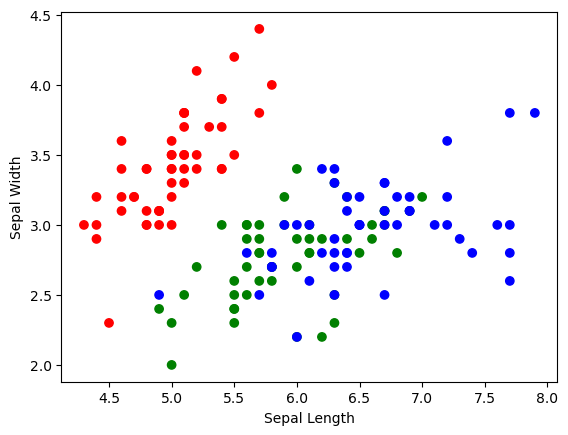

In [31]:
plt.scatter(df["SepalLengthCm"],
            df["SepalWidthCm"],
            c=df['Species'].map(colors))
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

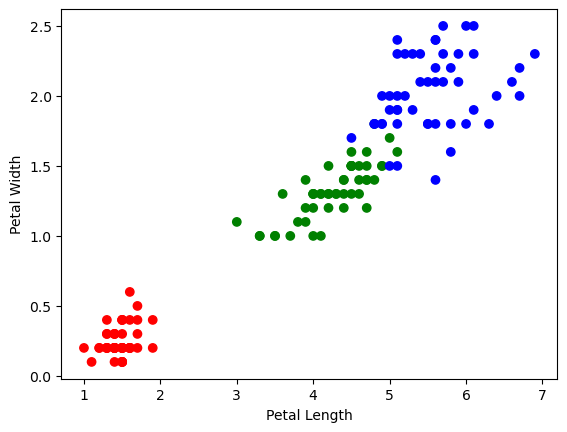

In [32]:
plt.scatter(df["PetalLengthCm"],
            df["PetalWidthCm"],
            c=df['Species'].map(colors))
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

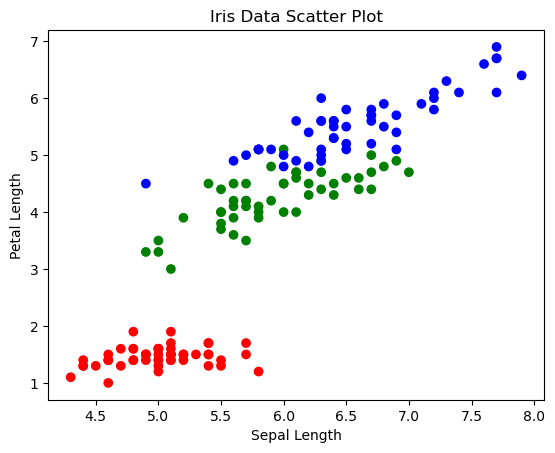

In [33]:
plt.scatter(df["SepalLengthCm"],
            df["PetalLengthCm"],
            c=df['Species'].map(colors))
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Iris Data Scatter Plot")
plt.show()

4. Split the dataset into a training set and a testing set

In [34]:
# put your answer here
# Array of features

X = df.drop(columns=['Species']).values

# Array of Labels

y = df['Species'].values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=5)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(135, 5)
(135,)
(15, 5)
(15,)


In [41]:
print(X_train)

[[2.40e+01 5.10e+00 3.30e+00 1.70e+00 5.00e-01]
 [1.24e+02 6.30e+00 2.70e+00 4.90e+00 1.80e+00]
 [1.31e+02 7.40e+00 2.80e+00 6.10e+00 1.90e+00]
 [2.20e+01 5.10e+00 3.70e+00 1.50e+00 4.00e-01]
 [1.30e+01 4.80e+00 3.00e+00 1.40e+00 1.00e-01]
 [7.20e+01 6.10e+00 2.80e+00 4.00e+00 1.30e+00]
 [1.29e+02 6.40e+00 2.80e+00 5.60e+00 2.10e+00]
 [4.90e+01 5.30e+00 3.70e+00 1.50e+00 2.00e-01]
 [7.30e+01 6.30e+00 2.50e+00 4.90e+00 1.50e+00]
 [8.90e+01 5.60e+00 3.00e+00 4.10e+00 1.30e+00]
 [1.49e+02 6.20e+00 3.40e+00 5.40e+00 2.30e+00]
 [7.50e+01 6.40e+00 2.90e+00 4.30e+00 1.30e+00]
 [9.70e+01 5.70e+00 2.90e+00 4.20e+00 1.30e+00]
 [6.40e+01 6.10e+00 2.90e+00 4.70e+00 1.40e+00]
 [1.33e+02 6.40e+00 2.80e+00 5.60e+00 2.20e+00]
 [4.00e+01 5.10e+00 3.40e+00 1.50e+00 2.00e-01]
 [5.40e+01 5.50e+00 2.30e+00 4.00e+00 1.30e+00]
 [8.00e+01 5.70e+00 2.60e+00 3.50e+00 1.00e+00]
 [1.10e+01 5.40e+00 3.70e+00 1.50e+00 2.00e-01]
 [5.10e+01 7.00e+00 3.20e+00 4.70e+00 1.40e+00]
 [5.00e+01 5.00e+00 3.30e+00 1.40e+00 2.

5. Train the model

In [46]:
# put your answer here

knn = KNeighborsClassifier(n_neighbors=13)

# train the model

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

1.0

6. Test the model

In [54]:
# put your answer here


knn.predict([[6.5,3.0,5.8,2.2, 51]])



array(['Iris-setosa'], dtype=object)